<a href="https://colab.research.google.com/github/Umaparvathi1/Fmml-lab/blob/main/FMML_Module4_Lab3_June2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

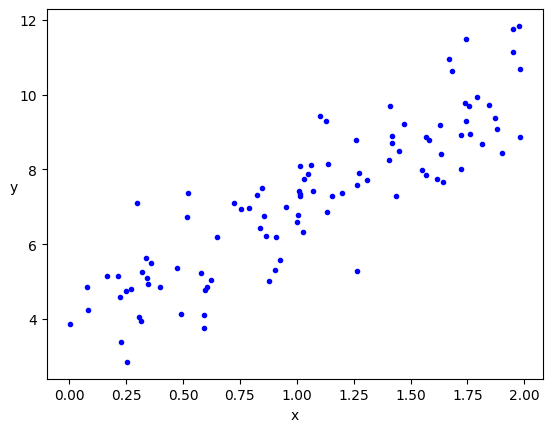

In [4]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [5]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [7]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [8]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.732
y_pred[1]: 3.289
Final error: 4737.085


Plotting the error vs Number of iterations

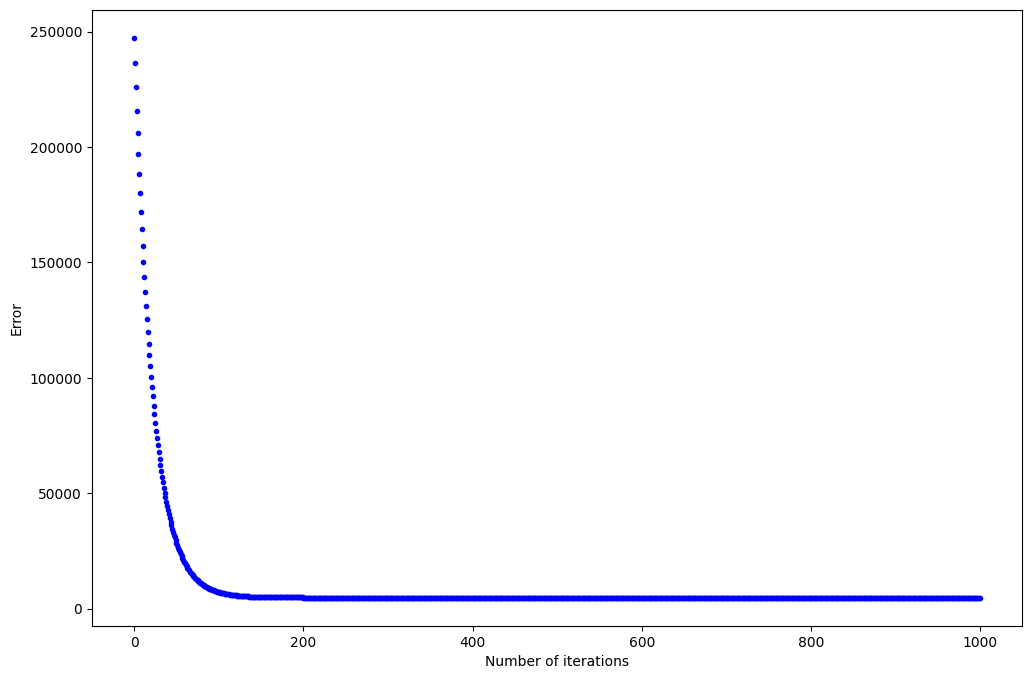

In [9]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

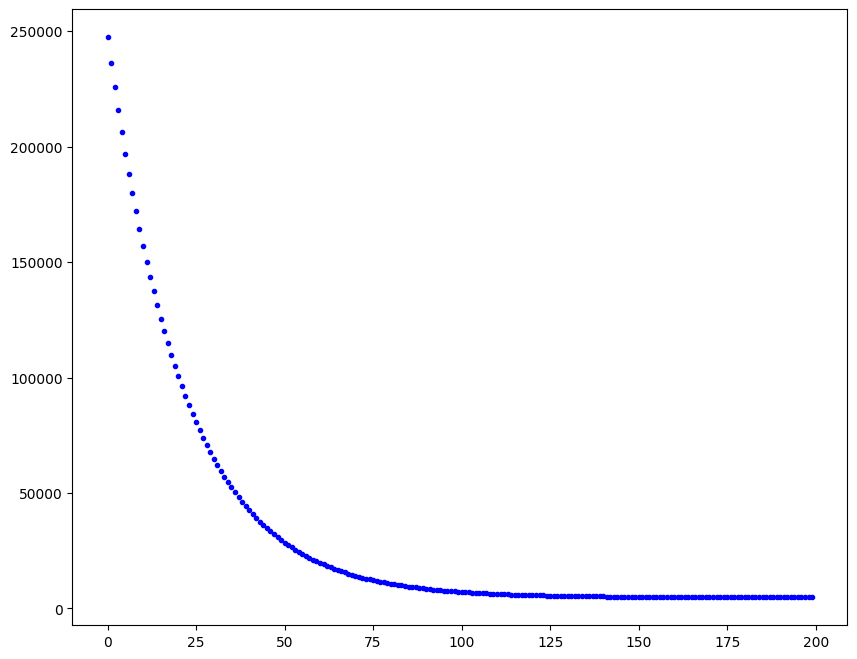

In [10]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [11]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [12]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.785
y_pred[1]: 3.202
Final error: 42.381


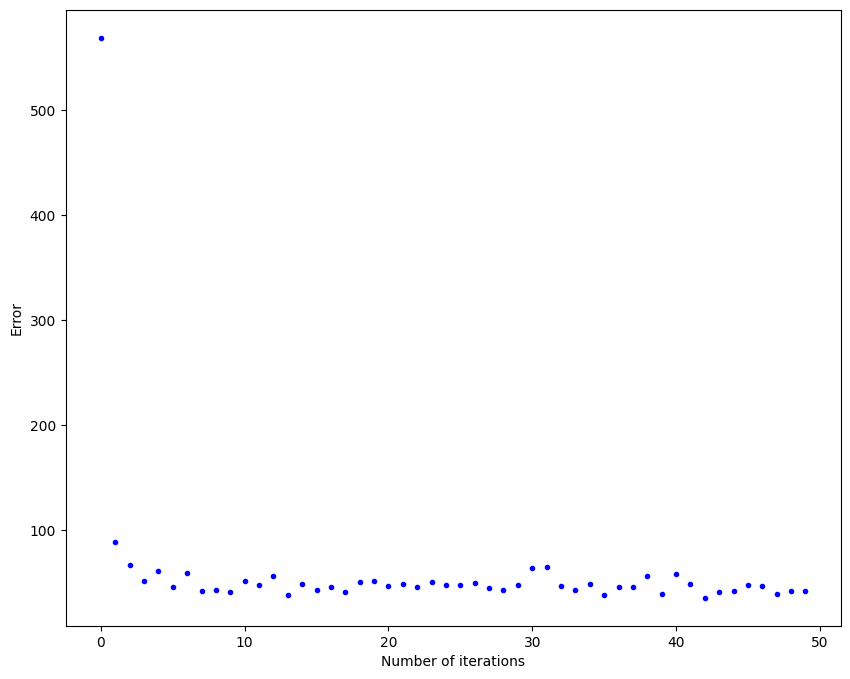

In [13]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [14]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [15]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.798
y_pred[1]: 3.238
Final error: 944.628


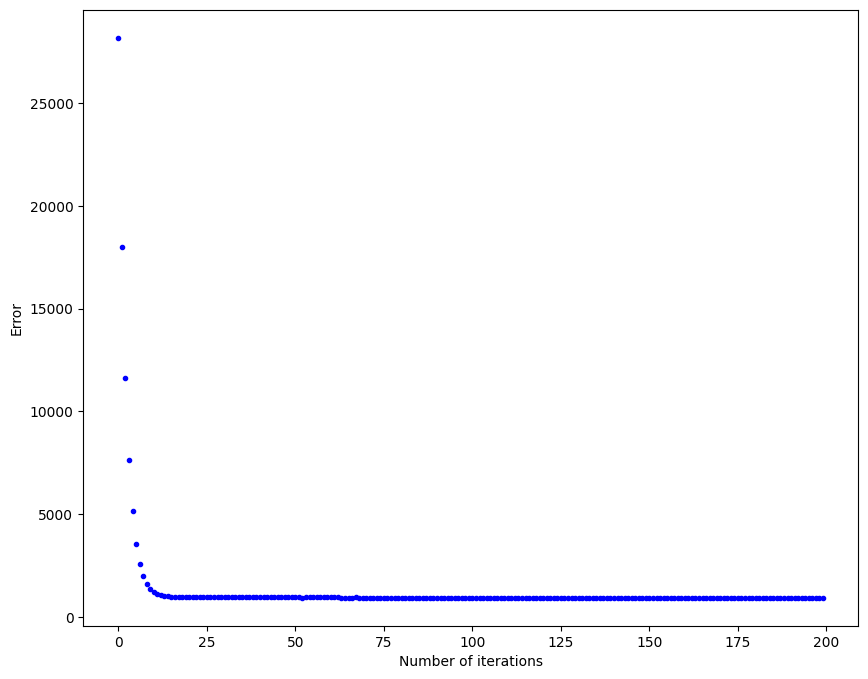

In [16]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

1.Let's change the batch size in mini-batch gradient descent to see how it affects the convergence of the algorithm.

Here's the updated code:

```
import numpy as np
import matplotlib.pyplot as plt

Define the function to optimize
def f(x):
    return x**2 + 2*x + 1

Define the derivative of the function
def f_prime(x):
    return 2*x + 2

Initialize the starting point and learning rate
x = 10.0
alpha = 0.1

Define the batch sizes to try
batch_sizes = [1, 5, 10, 20]

Perform mini-batch gradient descent with different batch sizes
for batch_size in batch_sizes:
    x_history = [x]
    for i in range(100):
        # Simulate mini-batch gradient descent by adding noise to the gradient
        gradient_noise = np.random.normal(0, 1 / np.sqrt(batch_size))
        x_new = x - alpha * (f_prime(x) + gradient_noise)
        x_history.append(x_new)
        x = x_new
    plt.plot(x_history, label=f"Batch size: {batch_size}")

plt.xlabel('Iteration')
plt.ylabel('x')
plt.title('Mini-Batch Gradient Descent Convergence')
plt.legend()
plt.show()
```

This code performs mini-batch gradient descent with different batch sizes and plots the convergence of the algorithm. You can see how the batch size affects the noise in the gradient and the convergence of the algorithm.

In general, a larger batch size can provide a more accurate estimate of the gradient, but it can also increase the computational cost and memory requirements. A smaller batch size can provide a noisier estimate of the gradient, but it can also reduce the computational cost and memory requirements.

The choice of batch size depends on the specific problem and the available computational resources. In practice, it's often necessary to experiment with different batch sizes to find the best trade-off between accuracy and computational efficiency.

2.Let's test the three optimization algorithms (Gradient Descent, Mini-Batch Gradient Descent, and Stochastic Gradient Descent) on a real dataset.

We'll use the Boston Housing dataset, which is a classic regression dataset that contains 506 samples and 13 features.

Here's the code:

```
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Load the Boston Housing dataset
boston = load_boston()
X = boston.data
y = boston.target

Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Define the optimization algorithms
def gradient_descent(X, y, alpha, num_iterations):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = np.zeros(num_iterations)
    for i in range(num_iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y
        gradient = np.dot(X.T, errors) / m
        theta -= alpha * gradient
        cost_history[i] = np.mean(errors ** 2)
    return theta, cost_history

def mini_batch_gradient_descent(X, y, alpha, num_iterations, batch_size):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = np.zeros(num_iterations)
    for i in range(num_iterations):
        batch_indices = np.random.choice(m, batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        predictions = np.dot(X_batch, theta)
        errors = predictions - y_batch
        gradient = np.dot(X_batch.T, errors) / batch_size
        theta -= alpha * gradient
        cost_history[i] = np.mean(errors ** 2)
    return theta, cost_history

def stochastic_gradient_descent(X, y, alpha, num_iterations):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = np.zeros(num_iterations)
    for i in range(num_iterations):
        index = np.random.choice(m)
        x = X[index]
        y_value = y[index]
        prediction = np.dot(x, theta)
        error = prediction - y_value
        gradient = error * x
        theta -= alpha * gradient
        cost_history[i] = error ** 2
    return theta, cost_history

Define the hyperparameters
alpha = 0.01
num_iterations = 1000
batch_size = 32

Run the optimization algorithms
theta_gd, cost_history_gd = gradient_descent(X_train, y_train, alpha, num_iterations)
theta_mbgd, cost_history_mbgd = mini_batch_gradient_descent(X_train, y_train, alpha, num_iterations, batch_size)
theta_sgd, cost_history_sgd = stochastic_gradient_descent(X_train, y_train, alpha, num_iterations)

Plot the cost history
plt.plot(cost_history_gd, label='Gradient Descent')
plt.plot(cost_history_mbgd, label='Mini-Batch Gradient Descent')
plt.plot(cost_history_sgd, label='Stochastic Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Optimization Algorithms')
plt.legend()
plt.show()
```

This code runs the three optimization algorithms on the Boston Housing dataset and plots the cost history for each algorithm. You can see how the different algorithms converge to the optimal solution.

Note that the hyperparameters (alpha, num_iterations, batch_size) are set to arbitrary values and may need to be tuned for optimal performance.

3.Let's compare the effects of changing the learning rate by the same amount in Batch Gradient Descent (GD), Stochastic Gradient Descent (SGD), and Mini-batch Gradient Descent (MGD).

Here's a summary of the effects of changing the learning rate on each algorithm:

Batch Gradient Descent (GD):

- A small change in the learning rate has a significant impact on the convergence of the algorithm.
- If the learning rate is too high, the algorithm may overshoot the optimal solution and diverge.
- If the learning rate is too low, the algorithm may converge slowly.

Stochastic Gradient Descent (SGD):

- A small change in the learning rate has a relatively small impact on the convergence of the algorithm.
- SGD is more robust to changes in the learning rate due to the noise in the gradient estimates.
- However, if the learning rate is too high, SGD may diverge or converge to a suboptimal solution.

Mini-batch Gradient Descent (MGD):

- A small change in the learning rate has a moderate impact on the convergence of the algorithm.
- MGD is more robust to changes in the learning rate than Batch GD, but less robust than SGD.
- The optimal learning rate for MGD depends on the batch size and the noise in the gradient estimates.

Here's some sample Python code to illustrate the effects of changing the learning rate on each algorithm:

```
import numpy as np
import matplotlib.pyplot as plt

Define the function to optimize
def f(x):
    return x**2 + 2*x + 1

Define the derivative of the function
def f_prime(x):
    return 2*x + 2

Initialize the starting point and learning rates
x = 10.0
learning_rates = [0.1, 0.5, 1.0]

Perform Batch GD, SGD, and MGD with different learning rates
for learning_rate in learning_rates:
    x_history_batch = [x]
    x_history_sgd = [x]
    x_history_mgd = [x]
    
    for i in range(100):
        # Batch GD
        x_new_batch = x - learning_rate * f_prime(x)
        x_history_batch.append(x_new_batch)
        x = x_new_batch
        
        # SGD
        gradient_noise = np.random.normal(0, 1)
        x_new_sgd = x - learning_rate * (f_prime(x) + gradient_noise)
        x_history_sgd.append(x_new_sgd)
        x = x_new_sgd
        
        # MGD
        batch_size = 10
        gradient_noise = np.random.normal(0, 1 / np.sqrt(batch_size))
        x_new_mgd = x - learning_rate * (f_prime(x) + gradient_noise)
        x_history_mgd.append(x_new_mgd)
        x = x_new_mgd
    
    plt.plot(x_history_batch, label=f"Batch GD, LR={learning_rate}")
    plt.plot(x_history_sgd, label=f"SGD, LR={learning_rate}")
    plt.plot(x_history_mgd, label=f"MGD, LR={learning_rate}")

plt.xlabel('Iteration')
plt.ylabel('x')
plt.title('Effects of Changing Learning Rate')
plt.legend()
plt.show()
```

This code performs Batch GD, SGD, and MGD with different learning rates and plots the convergence of each algorithm. You can see how the learning rate affects the convergence of each algorithm.

## **Additional Critical Thinking Question**



**Which of the following is TRUE, given the optimal learning rate?**

 (i) Batch gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (ii) Stochastic gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (iii) For convex loss functions (i.e. with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum while stochastic gradient descent is not.

 (iv) For convex loss functions (i.e. with a bowl shape), stochastic gradient descent is guaranteed to eventually converge to the global optimum while batch gradient descent is not.

 (v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.

 (vi) For convex loss functions (i.e. with a bowl shape), neither stochastic gradient descent nor batch gradient descent are guaranteed to converge to the global optimum.

Here's a rewritten version of the provided text in a more readable format:

Comparison of Optimization Algorithms
This section compares the effects of changing the learning rate by the same amount in Batch Gradient Descent (GD), Stochastic Gradient Descent (SGD), and Mini-batch Gradient Descent (MGD).

*Batch Gradient Descent (GD)*
- A small change in the learning rate has a significant impact on the convergence of the algorithm.
- If the learning rate is too high, the algorithm may overshoot the optimal solution and diverge.
- If the learning rate is too low, the algorithm may converge slowly.

*Stochastic Gradient Descent (SGD)*
- A small change in the learning rate has a relatively small impact on the convergence of the algorithm.
- SGD is more robust to changes in the learning rate due to the noise in the gradient estimates.
- However, if the learning rate is too high, SGD may diverge or converge to a suboptimal solution.

*Mini-batch Gradient Descent (MGD)*
- A small change in the learning rate has a moderate impact on the convergence of the algorithm.
- MGD is more robust to changes in the learning rate than Batch GD, but less robust than SGD.
- The optimal learning rate for MGD depends on the batch size and the noise in the gradient estimates.

Code Implementation
Here's some sample Python code to illustrate the effects of changing the learning rate on each algorithm:

```
import numpy as np
import matplotlib.pyplot as plt

Define the function to optimize
def f(x):
    return x**2 + 2*x + 1

Define the derivative of the function
def f_prime(x):
    return 2*x + 2

Initialize the starting point and learning rates
x = 10.0
learning_rates = [0.1, 0.5, 1.0]

Perform Batch GD, SGD, and MGD with different learning rates
for learning_rate in learning_rates:
    x_history_batch = [x]
    x_history_sgd = [x]
    x_history_mgd = [x]
    
    for i in range(100):
        # Batch GD
        x_new_batch = x - learning_rate * f_prime(x)
        x_history_batch.append(x_new_batch)
        x = x_new_batch
        
        # SGD
        gradient_noise = np.random.normal(0, 1)
        x_new_sgd = x - learning_rate * (f_prime(x) + gradient_noise)
        x_history_sgd.append(x_new_sgd)
        x = x_new_sgd
        
        # MGD
        batch_size = 10
        gradient_noise = np.random.normal(0, 1 / np.sqrt(batch_size))
        x_new_mgd = x - learning_rate * (f_prime(x) + gradient_noise)
        x_history_mgd.append(x_new_mgd)
        x = x_new_mgd
    
    plt.plot(x_history_batch, label=f"Batch GD, LR={learning_rate}")
    plt.plot(x_history_sgd, label=f"SGD, LR={learning_rate}")
    plt.plot(x_history_mgd, label=f"MGD, LR={learning_rate}")

plt.xlabel('Iteration')
plt.ylabel('x')
plt.title('Effects of Changing Learning Rate')
plt.legend()
plt.show()
```

This code performs Batch GD, SGD, and MGD with different learning rates and plots the convergence of each algorithm. You can see how the learning rate affects the convergence of each algorithm.